# FINAL PROJECT - INFO6105 

## OLYMPICS DATA ANALYSIS , PREDICTION, MODELLING

<center>
<img src="data/Olympics.jpg" width=1000 />
</center>

##### Datasets for this notebook are taken from multiple resources 

Importing Library required to Load dataset and do data Analysis

In [1]:
import pandas as pd
import numpy as np

In [2]:
# Loading Athelete Data from csv file
        olympics_data = pd.read_csv('data/athlete_events.csv')
olympics_data.head()

ID                      Name Sex   Age  Height  Weight            Team  \
0   1                 A Dijiang   M  24.0   180.0    80.0           China   
1   2                  A Lamusi   M  23.0   170.0    60.0           China   
2   3       Gunnar Nielsen Aaby   M  24.0     NaN     NaN         Denmark   
3   4      Edgar Lindenau Aabye   M  34.0     NaN     NaN  Denmark/Sweden   
4   5  Christine Jacoba Aaftink   F  21.0   185.0    82.0     Netherlands   

   NOC        Games  Year  Season       City          Sport  \
0  CHN  1992 Summer  1992  Summer  Barcelona     Basketball   
1  CHN  2012 Summer  2012  Summer     London           Judo   
2  DEN  1920 Summer  1920  Summer  Antwerpen       Football   
3  DEN  1900 Summer  1900  Summer      Paris     Tug-Of-War   
4  NED  1988 Winter  1988  Winter    Calgary  Speed Skating   

                              Event Medal  
0       Basketball Men's Basketball   NaN  
1      Judo Men's Extra-Lightweight   NaN  
2           Football Men's Football   NaN  
3       Tug-Of-War Men's Tug-Of-War  Gold  
4  Speed Skating Women's 500 metres   NaN

In [3]:
# Check for Null Values
olympics_data.isnull().sum()

ID             0
Name           0
Sex            0
Age         9474
Height     60171
Weight     62875
Team           0
NOC            0
Games          0
Year           0
Season         0
City           0
Sport          0
Event          0
Medal     231333
dtype: int64

We have multiple NULL values for Medal so We need to replace Medal values from NULL to LOST

In [4]:
olympics_data['Medal'].fillna('LOST', inplace = True)

In [5]:
# validatingif NULL values are replaced or not
olympics_data.isnull().sum()

ID            0
Name          0
Sex           0
Age        9474
Height    60171
Weight    62875
Team          0
NOC           0
Games         0
Year          0
Season        0
City          0
Sport         0
Event         0
Medal         0
dtype: int64

Validate if each NOC is linked to a Team 

In [6]:
olympics_data.loc[:, ['NOC', 'Team']].drop_duplicates()['NOC'].value_counts().head()

FRA    160
USA     97
GBR     96
SWE     52
NOR     46
Name: NOC, dtype: int64

We have multiple NOC linked to single team

We have data for NOC regions . We can load it and map to countries 

In [7]:
# Loading Data file for NOC regions
country = pd.read_csv('data/noc_regions.csv')
country.head(3)

NOC       region                 notes
0  AFG  Afghanistan                   NaN
1  AHO      Curacao  Netherlands Antilles
2  ALB      Albania                   NaN

In [8]:
# Dropping unnecessary column notes
country.drop('notes',axis=1)

NOC       region
0    AFG  Afghanistan
1    AHO      Curacao
2    ALB      Albania
3    ALG      Algeria
4    AND      Andorra
..   ...          ...
225  YEM        Yemen
226  YMD        Yemen
227  YUG       Serbia
228  ZAM       Zambia
229  ZIM     Zimbabwe

[230 rows x 2 columns]

merge country with olympics_data to map NOc with region in our final data

In [9]:
# Merging Olympics data with NOC data
olympics_data_final = olympics_data.merge(country,
                    right_on = 'NOC',
                    left_on = 'NOC',
                    how = 'left')

In [10]:
olympics_data_final.head(3)

ID                 Name Sex   Age  Height  Weight     Team  NOC  \
0   1            A Dijiang   M  24.0   180.0    80.0    China  CHN   
1   2             A Lamusi   M  23.0   170.0    60.0    China  CHN   
2   3  Gunnar Nielsen Aaby   M  24.0     NaN     NaN  Denmark  DEN   

         Games  Year  Season       City       Sport  \
0  1992 Summer  1992  Summer  Barcelona  Basketball   
1  2012 Summer  2012  Summer     London        Judo   
2  1920 Summer  1920  Summer  Antwerpen    Football   

                          Event Medal   region notes  
0   Basketball Men's Basketball  LOST    China   NaN  
1  Judo Men's Extra-Lightweight  LOST    China   NaN  
2       Football Men's Football  LOST  Denmark   NaN

In [11]:
##Check if anything missed in mapping
olympics_data_final.loc[olympics_data_final['region'].isnull(),['NOC', 'Team']].drop_duplicates()

NOC                      Team
578     SGP                 Singapore
6267    ROT  Refugee Olympic Athletes
44376   SGP              June Climene
61080   UNK                   Unknown
64674   TUV                    Tuvalu
80986   SGP                   Rika II
108582  SGP               Singapore-2
235895  SGP               Singapore-1

In [12]:
## I think we can ignore these countries and since we have SGP majority we can replace it manually
olympics_data_final['region'] = np.where(olympics_data_final['NOC']=='SGP', 'Singapore', olympics_data_final['region'])
olympics_data_final['region'] = np.where(olympics_data_final['NOC']=='ROT', 'Refugee Olympic Athletes', olympics_data_final['region'])
olympics_data_final['region']= np.where(olympics_data_final['NOC']=='UNK', 'Unknown', olympics_data_final['region'])
olympics_data_final['region'] = np.where(olympics_data_final['NOC']=='TUV', 'Tuvalu', olympics_data_final['region'])

In [13]:
## Validating again if anything pending 
olympics_data_final.loc[olympics_data_final['region'].isnull(),['NOC', 'Team']].drop_duplicates()

Empty DataFrame
Columns: [NOC, Team]
Index: []

In [14]:
olympics_data_final.head(3)

ID                 Name Sex   Age  Height  Weight     Team  NOC  \
0   1            A Dijiang   M  24.0   180.0    80.0    China  CHN   
1   2             A Lamusi   M  23.0   170.0    60.0    China  CHN   
2   3  Gunnar Nielsen Aaby   M  24.0     NaN     NaN  Denmark  DEN   

         Games  Year  Season       City       Sport  \
0  1992 Summer  1992  Summer  Barcelona  Basketball   
1  2012 Summer  2012  Summer     London        Judo   
2  1920 Summer  1920  Summer  Antwerpen    Football   

                          Event Medal   region notes  
0   Basketball Men's Basketball  LOST    China   NaN  
1  Judo Men's Extra-Lightweight  LOST    China   NaN  
2       Football Men's Football  LOST  Denmark   NaN

we can drop column Team from here as we now have region linked 

In [15]:
# Dropping column Team 
olympics_data_final.drop('Team',axis=1)

ID                      Name Sex   Age  Height  Weight  NOC  \
0            1                 A Dijiang   M  24.0   180.0    80.0  CHN   
1            2                  A Lamusi   M  23.0   170.0    60.0  CHN   
2            3       Gunnar Nielsen Aaby   M  24.0     NaN     NaN  DEN   
3            4      Edgar Lindenau Aabye   M  34.0     NaN     NaN  DEN   
4            5  Christine Jacoba Aaftink   F  21.0   185.0    82.0  NED   
...        ...                       ...  ..   ...     ...     ...  ...   
271111  135569                Andrzej ya   M  29.0   179.0    89.0  POL   
271112  135570                  Piotr ya   M  27.0   176.0    59.0  POL   
271113  135570                  Piotr ya   M  27.0   176.0    59.0  POL   
271114  135571        Tomasz Ireneusz ya   M  30.0   185.0    96.0  POL   
271115  135571        Tomasz Ireneusz ya   M  34.0   185.0    96.0  POL   

              Games  Year  Season            City          Sport  \
0       1992 Summer  1992  Summer       Barcelona     Basketball   
1       2012 Summer  2012  Summer          London           Judo   
2       1920 Summer  1920  Summer       Antwerpen       Football   
3       1900 Summer  1900  Summer           Paris     Tug-Of-War   
4       1988 Winter  1988  Winter         Calgary  Speed Skating   
...             ...   ...     ...             ...            ...   
271111  1976 Winter  1976  Winter       Innsbruck           Luge   
271112  2014 Winter  2014  Winter           Sochi    Ski Jumping   
271113  2014 Winter  2014  Winter           Sochi    Ski Jumping   
271114  1998 Winter  1998  Winter          Nagano      Bobsleigh   
271115  2002 Winter  2002  Winter  Salt Lake City      Bobsleigh   

                                           Event Medal       region notes  
0                    Basketball Men's Basketball  LOST        China   NaN  
1                   Judo Men's Extra-Lightweight  LOST        China   NaN  
2                        Football Men's Football  LOST      Denmark   NaN  
3                    Tug-Of-War Men's Tug-Of-War  Gold      Denmark   NaN  
4               Speed Skating Women's 500 metres  LOST  Netherlands   NaN  
...                                          ...   ...          ...   ...  
271111                Luge Mixed (Men)'s Doubles  LOST       Poland   NaN  
271112  Ski Jumping Men's Large Hill, Individual  LOST       Poland   NaN  
271113        Ski Jumping Men's Large Hill, Team  LOST       Poland   NaN  
271114                      Bobsleigh Men's Four  LOST       Poland   NaN  
271115                      Bobsleigh Men's Four  LOST       Poland   NaN  

[271116 rows x 16 columns]

In [16]:
# Dropping column notes
olympics_data_final= olympics_data_final.drop('notes',axis=1)

In [17]:
## Looks like Game is ocmbination of Year and Season so we can just check and drop if it is the case for all data
if (olympics_data_final['Games'].equals(olympics_data_final['Year'].map(str) + " " + olympics_data_final['Season'])):
    olympics_data_final = olympics_data_final.drop([ 'Games'], axis=1)

In [18]:
olympics_data_final.head(2)

ID       Name Sex   Age  Height  Weight   Team  NOC  Year  Season  \
0   1  A Dijiang   M  24.0   180.0    80.0  China  CHN  1992  Summer   
1   2   A Lamusi   M  23.0   170.0    60.0  China  CHN  2012  Summer   

        City       Sport                         Event Medal region  
0  Barcelona  Basketball   Basketball Men's Basketball  LOST  China  
1     London        Judo  Judo Men's Extra-Lightweight  LOST  China

##  We are good with Data cleansing now

 Let's do some basic  data analysis 

To check maximum Gold medals 

In [19]:
# getting data with Gold medals grouping by below mentioned columns
top_medal_scorers = olympics_data_final[olympics_data_final['Medal'] == 'Gold' ].groupby(['Year','NOC', 'Event', 'Sport', 'Season'])
top_medal_scorers

In [20]:
top_medal_scorers = top_medal_scorers.first()
top_medal_scorers = top_medal_scorers.reset_index()
top_medal_scorers.tail(3)

Year  NOC                                 Event          Sport  Season  \
6192  2016  UZB       Boxing Men's Light-Welterweight         Boxing  Summer   
6193  2016  UZB       Weightlifting Men's Heavyweight  Weightlifting  Summer   
6194  2016  VIE  Shooting Men's Air Pistol, 10 metres       Shooting  Summer   

         ID                                  Name Sex   Age  Height  Weight  \
6192  39193  Fazliddin Khasanbayevich Gaybnazarov   M  25.0   169.0    64.0   
6193  87401                      Ruslan Nurudinov   M  24.0   183.0   109.0   
6194  48966                         Hong Xun Vinh   M  41.0   175.0    75.0   

            Team            City Medal      region  
6192  Uzbekistan  Rio de Janeiro  Gold  Uzbekistan  
6193  Uzbekistan  Rio de Janeiro  Gold  Uzbekistan  
6194     Vietnam  Rio de Janeiro  Gold     Vietnam

In [21]:
top_medal_scorers['NOC'].value_counts()

USA    1131
URS     471
GER     319
GBR     289
FRA     264
       ... 
BDI       1
CRC       1
ECU       1
HKG       1
VIE       1
Name: NOC, Length: 109, dtype: int64

USA has taken maximum Gold medals home

In [22]:
###Creating a Dictionary to Calculate number of gamnes played per year by each region
lookup_dict = top_medal_scorers.groupby(['region', 'Year']).apply(lambda x: x.shape[0]).to_dict()
lookup_dict

{('Algeria', 1992): 1,
 ('Algeria', 1996): 2,
 ('Algeria', 2000): 1,
 ('Algeria', 2012): 1,
 ('Argentina', 1924): 1,
 ('Argentina', 1928): 3,
 ('Argentina', 1932): 3,
 ('Argentina', 1936): 2,
 ('Argentina', 1948): 3,
 ('Argentina', 1952): 1,
 ('Argentina', 2004): 2,
 ('Argentina', 2008): 2,
 ('Argentina', 2012): 1,
 ('Argentina', 2016): 3,
 ('Armenia', 1996): 1,
 ('Armenia', 2016): 1,
 ('Australia', 1896): 2,
 ('Australia', 1900): 3,
 ('Australia', 1908): 1,
 ('Australia', 1912): 2,
 ('Australia', 1924): 4,
 ('Australia', 1928): 1,
 ('Australia', 1932): 3,
 ('Australia', 1948): 2,
 ('Australia', 1952): 6,
 ('Australia', 1956): 13,
 ('Australia', 1960): 8,
 ('Australia', 1964): 6,
 ('Australia', 1968): 5,
 ('Australia', 1972): 8,
 ('Australia', 1980): 2,
 ('Australia', 1984): 4,
 ('Australia', 1988): 3,
 ('Australia', 1992): 7,
 ('Australia', 1996): 9,
 ('Australia', 2000): 16,
 ('Australia', 2002): 2,
 ('Australia', 2004): 17,
 ('Australia', 2006): 1,
 ('Australia', 2008): 14,
 ('Austr

## Hypothesis
#### Our Hypothesis is that team can have 'Home-Advantage'  , More number of Athletes have more chances of Winning and Better GDP leads to more number of medals

Since we don't have any such dataset we found a City to Country mapping and added that here to map cities to countries

In [23]:
city_country = { 'Antwerpen':'Belgium','Barcelona':'Spain', 'Garmisch-Partenkirchen':'Germany','Torino':'Italy' ,'London':'UK', 'Paris':'France', 'Calgary':'Canada',
       'Albertville':'France','Rio de Janeiro':'Brazil','Chamonix':'France', 'Lillehammer':'Norway', 'Los Angeles':'USA', 'Salt Lake City':'USA',
       'Helsinki':'Finland', 'Lake Placid':'USA', 'Sydney':'Australia', 'Atlanta':'USA', 'Stockholm':'Sweden',
       'Sochi':'Russia', 'Nagano':'Japan', 'Beijing':'China', 'Athina':'Greece',
       'Squaw Valley':'USA',  'Sarajevo': 'Bosnia and Herzegovina', 'Mexico City':'Mexico', 'Munich': 'Germany',
       'Seoul': 'South Korea', 'Berlin': 'Germany', 'Oslo': 'Norway', "Cortina d'Ampezzo":'Italy', 'Melbourne': 'Australia', 'Roma': 'Italy',
       'Amsterdam': 'Netherlands', 'Montreal': 'Canada','Innsbruck':'Austria', 'Moskva': 'Russia', 'Tokyo':'Japan', 'Vancouver':'Canada', 'Grenoble':'France',
       'Sapporo':'Japan',  'St. Louis':'USA', 'Sankt Moritz':'Switzerland'
       }

In [24]:
### Map city to country function
def map_dataset(data, city_country) : 
    data['Country'] = data['City'].map(city_country)
    return data

In [25]:
map_dataset(olympics_data_final,city_country)
olympics_data_final.head(3)

ID                 Name Sex   Age  Height  Weight     Team  NOC  Year  \
0   1            A Dijiang   M  24.0   180.0    80.0    China  CHN  1992   
1   2             A Lamusi   M  23.0   170.0    60.0    China  CHN  2012   
2   3  Gunnar Nielsen Aaby   M  24.0     NaN     NaN  Denmark  DEN  1920   

   Season       City       Sport                         Event Medal   region  \
0  Summer  Barcelona  Basketball   Basketball Men's Basketball  LOST    China   
1  Summer     London        Judo  Judo Men's Extra-Lightweight  LOST    China   
2  Summer  Antwerpen    Football       Football Men's Football  LOST  Denmark   

   Country  
0    Spain  
1       UK  
2  Belgium

In [26]:
olympics_data_final.isnull().sum()

ID             0
Name           0
Sex            0
Age         9474
Height     60171
Weight     62875
Team           0
NOC            0
Year           0
Season         0
City           0
Sport          0
Event          0
Medal          0
region         0
Country        0
dtype: int64

### Get Latitude and Longitude of Host locations to calculate distance 

In [27]:
## Loaded data to calculate distance on basis of latitude and longitude of country
## Since we don't have latitude longitude at city level we are taking data at country level to analyse
host_city_data = pd.read_csv('data/longitude-latitude.csv')
host_city_data= host_city_data.drop(["ISO-ALPHA-3","ISO-ALPHA-2","IOC","FIFA","ISO-Name","Historical","WikiData_ID","WikiData_Latitude","WikiData_Longitude","WikiData_Label","WikiData_Description"],axis=1)
host_city_data.head()

Country   Latitude  Longitude
0          Aruba  12.521110 -69.968338
1    Afghanistan  33.939110  67.709953
2         Angola -11.202692  17.873887
3       Anguilla  18.220554 -63.068615
4  Åland Islands  60.250716  20.374146

In [28]:
## Merge olympics data with host city data 
olympics_data_final = pd.merge(olympics_data_final, host_city_data, left_on='Country', right_on='Country')
olympics_data_final.head(5)

ID                   Name Sex   Age  Height  Weight     Team  NOC  Year  \
0   1              A Dijiang   M  24.0   180.0    80.0    China  CHN  1992   
1  33    Mika Lauri Aarnikka   M  24.0   187.0    76.0  Finland  FIN  1992   
2  43  Morten Gjerdrum Aasen   M  34.0   185.0    75.0   Norway  NOR  1992   
3  50             Arvi Aavik   M  22.0   185.0   106.0  Estonia  EST  1992   
4  64         M'Bairo Abakar   M  31.0     NaN     NaN     Chad  CHA  1992   

   Season       City          Sport                                    Event  \
0  Summer  Barcelona     Basketball              Basketball Men's Basketball   
1  Summer  Barcelona        Sailing          Sailing Men's Two Person Dinghy   
2  Summer  Barcelona  Equestrianism  Equestrianism Mixed Jumping, Individual   
3  Summer  Barcelona      Wrestling   Wrestling Men's Heavyweight, Freestyle   
4  Summer  Barcelona           Judo             Judo Men's Half-Middleweight   

  Medal   region Country   Latitude  Longitude  
0  LOST    China   Spain  40.463667   -3.74922  
1  LOST  Finland   Spain  40.463667   -3.74922  
2  LOST   Norway   Spain  40.463667   -3.74922  
3  LOST  Estonia   Spain  40.463667   -3.74922  
4  LOST     Chad   Spain  40.463667   -3.74922

#### Merge Latitude and Longitude with Team origin country . considering Athletes are staying in same country as of origin

In [29]:
olympics_data_final = pd.merge(olympics_data_final, host_city_data, left_on='region', right_on='Country')
olympics_data_final.head(5)

ID            Name Sex   Age  Height  Weight       Team  NOC  Year  \
0      1       A Dijiang   M  24.0   180.0    80.0      China  CHN  1992   
1   5887     Au Woon Yiu   M  31.0   168.0    65.0  Hong Kong  HKG  1992   
2   6848  Bai Chongguang   M  21.0   184.0    83.0      China  CHN  1992   
3   6854         Bai Mei   F  17.0   166.0    46.0      China  CHN  1992   
4  11225        Bi Zhong   M  23.0   188.0   110.0      China  CHN  1992   

   Season  ...                Sport                                   Event  \
0  Summer  ...           Basketball             Basketball Men's Basketball   
1  Summer  ...                 Judo             Judo Men's Half-Lightweight   
2  Summer  ...               Boxing          Boxing Men's Light-Heavyweight   
3  Summer  ...  Rhythmic Gymnastics  Rhythmic Gymnastics Women's Individual   
4  Summer  ...            Athletics            Athletics Men's Hammer Throw   

  Medal region Country_x Latitude_x  Longitude_x  Country_y Latitude_y  \
0  LOST  China     Spain  40.463667     -3.74922      China   35.86166   
1  LOST  China     Spain  40.463667     -3.74922      China   35.86166   
2  LOST  China     Spain  40.463667     -3.74922      China   35.86166   
3  LOST  China     Spain  40.463667     -3.74922      China   35.86166   
4  LOST  China     Spain  40.463667     -3.74922      China   35.86166   

   Longitude_y  
0   104.195397  
1   104.195397  
2   104.195397  
3   104.195397  
4   104.195397  

[5 rows x 21 columns]

In [30]:
pip install geopy

Note: you may need to restart the kernel to use updated packages.


In [31]:
from geopy.distance import  geodesic

In [32]:
olympics_data_final['AtheleteLatitude'] = list(zip(olympics_data_final.Latitude_y, olympics_data_final.Longitude_y))


In [33]:
olympics_data_final['HostCountryLatitude'] = list(zip(olympics_data_final.Latitude_x, olympics_data_final.Longitude_x))

#### GeoPy is a Python library that makes geographical calculations

We calculated distance between host country and origin country using this library and added reuslt in new column 'diff_distance' in our Dataset

In [34]:
olympics_data_final['distance'] = np.vectorize(geodesic)(olympics_data_final['AtheleteLatitude'], olympics_data_final['HostCountryLatitude'])

In [35]:
#cast the vincenty distance from Distance ojbect to float 
olympics_data_final['distance'] = olympics_data_final['distance'].astype(str).str[:-3].astype(float)

olympics_data_final = pd.concat([olympics_data_final, olympics_data_final['distance']], axis=1)

#take a look at the results
olympics_data_final.head()

ID            Name Sex   Age  Height  Weight       Team  NOC  Year  \
0      1       A Dijiang   M  24.0   180.0    80.0      China  CHN  1992   
1   5887     Au Woon Yiu   M  31.0   168.0    65.0  Hong Kong  HKG  1992   
2   6848  Bai Chongguang   M  21.0   184.0    83.0      China  CHN  1992   
3   6854         Bai Mei   F  17.0   166.0    46.0      China  CHN  1992   
4  11225        Bi Zhong   M  23.0   188.0   110.0      China  CHN  1992   

   Season  ... Country_x Latitude_x Longitude_x Country_y Latitude_y  \
0  Summer  ...     Spain  40.463667    -3.74922     China   35.86166   
1  Summer  ...     Spain  40.463667    -3.74922     China   35.86166   
2  Summer  ...     Spain  40.463667    -3.74922     China   35.86166   
3  Summer  ...     Spain  40.463667    -3.74922     China   35.86166   
4  Summer  ...     Spain  40.463667    -3.74922     China   35.86166   

  Longitude_y        AtheleteLatitude    HostCountryLatitude     distance  \
0  104.195397  (35.86166, 104.195397)  (40.463667, -3.74922)  8808.721088   
1  104.195397  (35.86166, 104.195397)  (40.463667, -3.74922)  8808.721088   
2  104.195397  (35.86166, 104.195397)  (40.463667, -3.74922)  8808.721088   
3  104.195397  (35.86166, 104.195397)  (40.463667, -3.74922)  8808.721088   
4  104.195397  (35.86166, 104.195397)  (40.463667, -3.74922)  8808.721088   

      distance  
0  8808.721088  
1  8808.721088  
2  8808.721088  
3  8808.721088  
4  8808.721088  

[5 rows x 25 columns]

In [36]:
olympics_data_final.head(3)

ID            Name Sex   Age  Height  Weight       Team  NOC  Year  \
0     1       A Dijiang   M  24.0   180.0    80.0      China  CHN  1992   
1  5887     Au Woon Yiu   M  31.0   168.0    65.0  Hong Kong  HKG  1992   
2  6848  Bai Chongguang   M  21.0   184.0    83.0      China  CHN  1992   

   Season  ... Country_x Latitude_x Longitude_x Country_y Latitude_y  \
0  Summer  ...     Spain  40.463667    -3.74922     China   35.86166   
1  Summer  ...     Spain  40.463667    -3.74922     China   35.86166   
2  Summer  ...     Spain  40.463667    -3.74922     China   35.86166   

  Longitude_y        AtheleteLatitude    HostCountryLatitude     distance  \
0  104.195397  (35.86166, 104.195397)  (40.463667, -3.74922)  8808.721088   
1  104.195397  (35.86166, 104.195397)  (40.463667, -3.74922)  8808.721088   
2  104.195397  (35.86166, 104.195397)  (40.463667, -3.74922)  8808.721088   

      distance  
0  8808.721088  
1  8808.721088  
2  8808.721088  

[3 rows x 25 columns]

In [37]:
olympics_data_final.columns

Index(['ID', 'Name', 'Sex', 'Age', 'Height', 'Weight', 'Team', 'NOC', 'Year',
       'Season', 'City', 'Sport', 'Event', 'Medal', 'region', 'Country_x',
       'Latitude_x', 'Longitude_x', 'Country_y', 'Latitude_y', 'Longitude_y',
       'AtheleteLatitude', 'HostCountryLatitude', 'distance', 'distance'],
      dtype='object')

### Plot graph of Players across years for male and female

In [38]:
data_men_women = olympics_data_final.groupby(['Year', 'Sex']).agg({'Name': 'count'})

data_men_women_percentage = data_men_women.groupby(level=0).apply(lambda x:
                                                 100 * x / float(x.sum()))
data_men_women_percentage = data_men_women_percentage.reset_index()

In [39]:
data_men_women_percentage.head(3)

Year Sex        Name
0  1896   M  100.000000
1  1900   F    1.329305
2  1900   M   98.670695

In [40]:
import matplotlib.pyplot as  plt
import seaborn as sns
chart = sns.barplot(x="Year", y="Name", hue="Sex", data=data_men_women_percentage, palette="Set2") 
chart.set_xticklabels(chart.get_xticklabels(), rotation=90, ha="right")
chart.set_title('Proportion of men and women')
chart.set_ylabel('Percentage of players')
plt.show()

### Graph above shows that number of female Athletes have increased over years

In [41]:
olympics_data_final.columns

Index(['ID', 'Name', 'Sex', 'Age', 'Height', 'Weight', 'Team', 'NOC', 'Year',
       'Season', 'City', 'Sport', 'Event', 'Medal', 'region', 'Country_x',
       'Latitude_x', 'Longitude_x', 'Country_y', 'Latitude_y', 'Longitude_y',
       'AtheleteLatitude', 'HostCountryLatitude', 'distance', 'distance'],
      dtype='object')

TOP 5 COUNTRIES WON MOST MEDALS

In [42]:
countries_won_most_medals=(olympics_data_final.region.value_counts().reset_index(name='Medal').head())
  
totalGoldMedals = olympics_data_final.region.value_counts().reset_index(name='Medal').head(5)
g = sns.catplot(x="index", y="Medal", data=totalGoldMedals,
                height=6, kind="bar", palette="muted")
g.despine(left=True)
g.set_xlabels("Top 5 countries")
g.set_ylabels("Number of Medals")
plt.title('Medals per Country')
plt.show()

### Germany won maximum number of medals

In [43]:
notNullMedals = olympics_data_final[(olympics_data_final['Height'].notnull()) & (olympics_data_final['Weight'].notnull())]

In [44]:
plt.figure(figsize=(12, 10))
ax = sns.scatterplot(x="Height", y="Weight", data=notNullMedals)
plt.title('Height vs Weight of Olympic Medalists')

Text(0.5, 1.0, 'Height vs Weight of Olympic Medalists')

The vast majority show a linear relation between height and weight (the more the weight, the more the height).

We have exceptions here as well!

All the cities hosted the Olympic games


In [45]:
## Calculating cities with year and number of matches played in that city
cities=olympics_data_final.groupby('City').apply(lambda x:x ['Year'].unique()).to_frame().reset_index()
cities.columns=['City','Years']
cities['Occurence'] = [len(c) for c in cities['Years']]
cities.sort_values('Occurence', ascending = False)

City               Years  Occurence
3                   Athina  [2004, 1906, 1896]          3
22                   Paris        [1924, 1900]          2
30               Stockholm        [1912, 1956]          2
13               Innsbruck        [1976, 1964]          2
25            Sankt Moritz        [1948, 1928]          2
0              Albertville              [1992]          1
26                 Sapporo              [1972]          1
21                    Oslo              [1952]          1
23          Rio de Janeiro              [2016]          1
24                    Roma              [1960]          1
27                Sarajevo              [1984]          1
19                  Munich              [1972]          1
28                   Seoul              [1988]          1
29                   Sochi              [2014]          1
31                  Sydney              [2000]          1
32                   Tokyo              [1964]          1
33                  Torino              [2006]          1
20                  Nagano              [1998]          1
17                Montreal              [1976]          1
18                  Moskva              [1980]          1
1                Amsterdam              [1928]          1
16             Mexico City              [1968]          1
15               Melbourne              [1956]          1
14             Lillehammer              [1994]          1
12                Helsinki              [1952]          1
11                Grenoble              [1968]          1
10  Garmisch-Partenkirchen              [1936]          1
9        Cortina d'Ampezzo              [1956]          1
8                 Chamonix              [1924]          1
7                  Calgary              [1988]          1
6                   Berlin              [1936]          1
5                  Beijing              [2008]          1
4                Barcelona              [1992]          1
2                Antwerpen              [1920]          1
34               Vancouver              [2010]          1

In [46]:
olympics_data_final.head(3)

ID            Name Sex   Age  Height  Weight       Team  NOC  Year  \
0     1       A Dijiang   M  24.0   180.0    80.0      China  CHN  1992   
1  5887     Au Woon Yiu   M  31.0   168.0    65.0  Hong Kong  HKG  1992   
2  6848  Bai Chongguang   M  21.0   184.0    83.0      China  CHN  1992   

   Season  ... Country_x Latitude_x Longitude_x Country_y Latitude_y  \
0  Summer  ...     Spain  40.463667    -3.74922     China   35.86166   
1  Summer  ...     Spain  40.463667    -3.74922     China   35.86166   
2  Summer  ...     Spain  40.463667    -3.74922     China   35.86166   

  Longitude_y        AtheleteLatitude    HostCountryLatitude     distance  \
0  104.195397  (35.86166, 104.195397)  (40.463667, -3.74922)  8808.721088   
1  104.195397  (35.86166, 104.195397)  (40.463667, -3.74922)  8808.721088   
2  104.195397  (35.86166, 104.195397)  (40.463667, -3.74922)  8808.721088   

      distance  
0  8808.721088  
1  8808.721088  
2  8808.721088  

[3 rows x 25 columns]

In [47]:
olympics_data_final.head()

ID            Name Sex   Age  Height  Weight       Team  NOC  Year  \
0      1       A Dijiang   M  24.0   180.0    80.0      China  CHN  1992   
1   5887     Au Woon Yiu   M  31.0   168.0    65.0  Hong Kong  HKG  1992   
2   6848  Bai Chongguang   M  21.0   184.0    83.0      China  CHN  1992   
3   6854         Bai Mei   F  17.0   166.0    46.0      China  CHN  1992   
4  11225        Bi Zhong   M  23.0   188.0   110.0      China  CHN  1992   

   Season  ... Country_x Latitude_x Longitude_x Country_y Latitude_y  \
0  Summer  ...     Spain  40.463667    -3.74922     China   35.86166   
1  Summer  ...     Spain  40.463667    -3.74922     China   35.86166   
2  Summer  ...     Spain  40.463667    -3.74922     China   35.86166   
3  Summer  ...     Spain  40.463667    -3.74922     China   35.86166   
4  Summer  ...     Spain  40.463667    -3.74922     China   35.86166   

  Longitude_y        AtheleteLatitude    HostCountryLatitude     distance  \
0  104.195397  (35.86166, 104.195397)  (40.463667, -3.74922)  8808.721088   
1  104.195397  (35.86166, 104.195397)  (40.463667, -3.74922)  8808.721088   
2  104.195397  (35.86166, 104.195397)  (40.463667, -3.74922)  8808.721088   
3  104.195397  (35.86166, 104.195397)  (40.463667, -3.74922)  8808.721088   
4  104.195397  (35.86166, 104.195397)  (40.463667, -3.74922)  8808.721088   

      distance  
0  8808.721088  
1  8808.721088  
2  8808.721088  
3  8808.721088  
4  8808.721088  

[5 rows x 25 columns]

In [48]:
final_data=pd.DataFrame(olympics_data_final)
type(final_data)

pandas.core.frame.DataFrame

### Calculating number of Medals won per country per year

In [49]:
ranks = olympics_data_final[olympics_data_final['Medal'] == 'Gold'].groupby(['region', 'Year', 'Sport', 'Event'])
ranks = ranks.first()
ranks = ranks.reset_index()
ranks['Medal_count'] = ranks['region'].value_counts()

In [50]:
ranks_data= ranks.groupby(['Year','region'])['Medal'].count()
type(ranks_data)

pandas.core.series.Series

In [51]:
ranks_data = pd.DataFrame(ranks_data)
type(ranks_data)

pandas.core.frame.DataFrame

In [52]:
ranks_data.head(5)

Medal
Year region          
1896 Australia      2
     Austria        2
     Denmark        1
     France         5
     Germany        7

In [53]:
final_data_medal = pd.merge(ranks_data, olympics_data_final, left_on='region', right_on='region')

In [54]:
final_data_medal.head()

region  Medal_x    ID                          Name Sex   Age  Height  \
0  Australia        2   805              April Jane Adams   F  19.0     NaN   
1  Australia        2   835  Phillip Maxwell "Phil" Adams   M  46.0   163.0   
2  Australia        2   835  Phillip Maxwell "Phil" Adams   M  46.0   163.0   
3  Australia        2  1311   Nicholas Mark "Nick" A'Hern   M  23.0   169.0   
4  Australia        2  1534                  Brett Aitken   M  21.0   173.0   

   Weight       Team  NOC  ...  Country_x Latitude_x Longitude_x  Country_y  \
0     NaN  Australia  AUS  ...      Spain  40.463667    -3.74922  Australia   
1    93.0  Australia  AUS  ...      Spain  40.463667    -3.74922  Australia   
2    93.0  Australia  AUS  ...      Spain  40.463667    -3.74922  Australia   
3    61.0  Australia  AUS  ...      Spain  40.463667    -3.74922  Australia   
4    65.0  Australia  AUS  ...      Spain  40.463667    -3.74922  Australia   

  Latitude_y Longitude_y          AtheleteLatitude    HostCountryLatitude  \
0 -25.274398  133.775136  (-25.274398, 133.775136)  (40.463667, -3.74922)   
1 -25.274398  133.775136  (-25.274398, 133.775136)  (40.463667, -3.74922)   
2 -25.274398  133.775136  (-25.274398, 133.775136)  (40.463667, -3.74922)   
3 -25.274398  133.775136  (-25.274398, 133.775136)  (40.463667, -3.74922)   
4 -25.274398  133.775136  (-25.274398, 133.775136)  (40.463667, -3.74922)   

       distance      distance  
0  15755.532939  15755.532939  
1  15755.532939  15755.532939  
2  15755.532939  15755.532939  
3  15755.532939  15755.532939  
4  15755.532939  15755.532939  

[5 rows x 26 columns]

In [55]:
final_data_medal = final_data_medal.drop(["ID","Name","Sex"] , axis=1)

In [56]:
final_data_medal = final_data_medal.drop(["Team","NOC","Season","Sport","City","Event","Medal_y","Country_x","Latitude_x","Longitude_x"] , axis=1)

In [57]:
final_data_medal = final_data_medal.drop(["Country_y","Latitude_y","Longitude_y","AtheleteLatitude","HostCountryLatitude"] , axis=1)

In [58]:
final_data_medal.head()

region  Medal_x   Age  Height  Weight  Year      distance      distance
0  Australia        2  19.0     NaN     NaN  1992  15755.532939  15755.532939
1  Australia        2  46.0   163.0    93.0  1992  15755.532939  15755.532939
2  Australia        2  46.0   163.0    93.0  1992  15755.532939  15755.532939
3  Australia        2  23.0   169.0    61.0  1992  15755.532939  15755.532939
4  Australia        2  21.0   173.0    65.0  1992  15755.532939  15755.532939

#### Calclating Correlation of Distance tarvelled versus Medal if they are related or not

Populating the interactive namespace from numpy and matplotlib


Text(17722.49994187395, 70, 'Correlation = 1.528724285250452e-05')

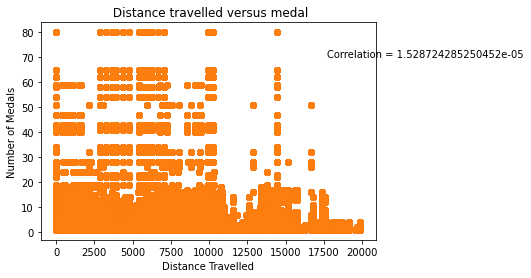

In [65]:
import matplotlib.pyplot as  plt
%pylab inline
%matplotlib inline

medals = final_data_medal['Medal_x'] > 0
correlation = final_data_medal.loc[medals, ['distance', 'Medal_x']].corr()['Medal_x'][0]

plot(final_data_medal.loc[medals, 'distance'], 
     final_data_medal.loc[medals, 'Medal_x'] , 
     linestyle = 'none', 
     marker = 'o',
     alpha = 0.4)
xlabel('Distance Travelled')

ylabel('Number of Medals')
title(' Distance travelled versus medal')
text(np.nanpercentile(final_data_medal['distance'], 99.6), 
     max(final_data_medal['Medal_x']) - 10,
     "Correlation = " + str(correlation))

Positive correlation means there is direct relation between 2 variable that means our Hypothesis is proved false. Distance travelled if increased doesn't reduce the medal count .

### Considering Population as a factor to pdict number of Medal wins for a country

 Checking if GDP plays role in medal count 

In [66]:
## Loading World GDP data from dataset
GDP = pd.read_csv('data/world_gdp.csv' , skiprows = 3)
GDP.head(3)

Country Name Country Code     Indicator Name  Indicator Code          1960  \
0  Afghanistan          AFG  GDP (current US$)  NY.GDP.MKTP.CD  5.377778e+08   
1      Albania          ALB  GDP (current US$)  NY.GDP.MKTP.CD           NaN   
2      Algeria          DZA  GDP (current US$)  NY.GDP.MKTP.CD  2.723649e+09   

           1961          1962          1963          1964          1965  ...  \
0  5.488889e+08  5.466667e+08  7.511112e+08  8.000000e+08  1.006667e+09  ...   
1           NaN           NaN           NaN           NaN           NaN  ...   
2  2.434777e+09  2.001469e+09  2.703015e+09  2.909352e+09  3.136259e+09  ...   

           2007          2008          2009          2010          2011  \
0  9.843842e+09  1.019053e+10  1.248694e+10  1.593680e+10  1.793024e+10   
1  1.070101e+10  1.288135e+10  1.204421e+10  1.192695e+10  1.289087e+10   
2  1.349770e+11  1.710010e+11  1.372110e+11  1.612070e+11  2.000190e+11   

           2012          2013          2014          2015          2016  
0  2.053654e+10  2.004633e+10  2.005019e+10  1.921556e+10  1.946902e+10  
1  1.231978e+10  1.277628e+10  1.322824e+10  1.133526e+10  1.186387e+10  
2  2.090590e+11  2.097550e+11  2.138100e+11  1.658740e+11  1.590490e+11  

[3 rows x 61 columns]

In [67]:
GDP =GDP.drop(['Indicator Name','Indicator Code'],axis=1)

In [68]:
## Converting Years in row to column
GDP = pd.melt(GDP, id_vars = ['Country Name', 'Country Code'], var_name = 'Year', value_name = 'GDP')

In [69]:
GDP['Year'] = pd.to_numeric(GDP['Year'])

In [70]:
GDP.head(10)

Country Name Country Code  Year           GDP
0     Afghanistan          AFG  1960  5.377778e+08
1         Albania          ALB  1960           NaN
2         Algeria          DZA  1960  2.723649e+09
3  American Samoa          ASM  1960           NaN
4         Andorra          AND  1960           NaN
5          Angola          AGO  1960           NaN
6         Antigua          ATG  1960           NaN
7       Argentina          ARG  1960           NaN
8         Armenia          ARM  1960           NaN
9           Aruba          ABW  1960           NaN

In [71]:
GDP.dropna()

Country Name Country Code  Year           GDP
0      Afghanistan          AFG  1960  5.377778e+08
2          Algeria          DZA  1960  2.723649e+09
10       Australia          AUS  1960  1.859335e+10
11         Austria          AUT  1960  6.592694e+09
13         Bahamas          BHS  1960  1.698039e+08
...            ...          ...   ...           ...
12477      Vietnam          VNM  2016  2.052760e+11
12479    Palestine          PSE  2016  1.339710e+10
12480        Yemen          YEM  2016  2.731761e+10
12481       Zambia          ZMB  2016  2.106399e+10
12482     Zimbabwe          ZWE  2016  1.661996e+10

[9258 rows x 4 columns]

In [72]:
olympics_gdp_analysis = olympics_data_final.merge(GDP[['Country Name', 'Country Code']].drop_duplicates(),
                                            left_on = 'Team',
                                            right_on = 'Country Name',
                                            how = 'left')

olympics_gdp_analysis.drop('Country Name', axis = 1, inplace = True)

In [73]:
olympics_gdp_analysis.head(3)

ID            Name Sex   Age  Height  Weight       Team  NOC  Year  \
0     1       A Dijiang   M  24.0   180.0    80.0      China  CHN  1992   
1  5887     Au Woon Yiu   M  31.0   168.0    65.0  Hong Kong  HKG  1992   
2  6848  Bai Chongguang   M  21.0   184.0    83.0      China  CHN  1992   

   Season  ... Latitude_x Longitude_x Country_y Latitude_y Longitude_y  \
0  Summer  ...  40.463667    -3.74922     China   35.86166  104.195397   
1  Summer  ...  40.463667    -3.74922     China   35.86166  104.195397   
2  Summer  ...  40.463667    -3.74922     China   35.86166  104.195397   

         AtheleteLatitude    HostCountryLatitude     distance     distance  \
0  (35.86166, 104.195397)  (40.463667, -3.74922)  8808.721088  8808.721088   
1  (35.86166, 104.195397)  (40.463667, -3.74922)  8808.721088  8808.721088   
2  (35.86166, 104.195397)  (40.463667, -3.74922)  8808.721088  8808.721088   

   Country Code  
0           CHN  
1           NaN  
2           CHN  

[3 rows x 26 columns]

In [74]:
## Merge GDP data with final data for building Model
olympics_gdp_data = olympics_gdp_analysis.merge(GDP,
                                                left_on = ['Country Code', 'Year'],
                                                right_on = ['Country Code', 'Year'],
                                                how = 'left')

olympics_gdp_data.drop('Country Name', axis = 1, inplace = True)

In [75]:
olympics_gdp_data.head(3)

ID            Name Sex   Age  Height  Weight       Team  NOC  Year  \
0     1       A Dijiang   M  24.0   180.0    80.0      China  CHN  1992   
1  5887     Au Woon Yiu   M  31.0   168.0    65.0  Hong Kong  HKG  1992   
2  6848  Bai Chongguang   M  21.0   184.0    83.0      China  CHN  1992   

   Season  ... Longitude_x Country_y Latitude_y Longitude_y  \
0  Summer  ...    -3.74922     China   35.86166  104.195397   
1  Summer  ...    -3.74922     China   35.86166  104.195397   
2  Summer  ...    -3.74922     China   35.86166  104.195397   

         AtheleteLatitude    HostCountryLatitude     distance     distance  \
0  (35.86166, 104.195397)  (40.463667, -3.74922)  8808.721088  8808.721088   
1  (35.86166, 104.195397)  (40.463667, -3.74922)  8808.721088  8808.721088   
2  (35.86166, 104.195397)  (40.463667, -3.74922)  8808.721088  8808.721088   

  Country Code           GDP  
0          CHN  4.269160e+11  
1          NaN           NaN  
2          CHN  4.269160e+11  

[3 rows x 27 columns]

In [76]:
ranks_data.head(2)

Medal
Year region          
1896 Australia      2
     Austria        2

In [77]:
olympics_gdp_data.head(2)

ID         Name Sex   Age  Height  Weight       Team  NOC  Year  Season  \
0     1    A Dijiang   M  24.0   180.0    80.0      China  CHN  1992  Summer   
1  5887  Au Woon Yiu   M  31.0   168.0    65.0  Hong Kong  HKG  1992  Summer   

   ... Longitude_x Country_y Latitude_y Longitude_y        AtheleteLatitude  \
0  ...    -3.74922     China   35.86166  104.195397  (35.86166, 104.195397)   
1  ...    -3.74922     China   35.86166  104.195397  (35.86166, 104.195397)   

     HostCountryLatitude     distance     distance Country Code           GDP  
0  (40.463667, -3.74922)  8808.721088  8808.721088          CHN  4.269160e+11  
1  (40.463667, -3.74922)  8808.721088  8808.721088          NaN           NaN  

[2 rows x 27 columns]

In [78]:
olympics_gdp_data['GDP'].dropna()

0         4.269160e+11
2         4.269160e+11
3         4.269160e+11
4         4.269160e+11
5         4.269160e+11
              ...     
190296    6.649889e+09
190297    6.649889e+09
190298    6.649889e+09
190299    6.649889e+09
190300    6.649889e+09
Name: GDP, Length: 117442, dtype: float64

In [79]:
year_team_gdp = olympics_gdp_data.loc[:, ['Year', 'Team', 'GDP','Age','Height']].drop_duplicates()

medals_gdp = ranks_data.merge(year_team_gdp,
                                   left_on = ['Year', 'region'],
                                   right_on = ['Year', 'Team'],
                                   how = 'left')



In [80]:
medals_gdp.head(10)

Year  Medal       Team  GDP   Age  Height
0  1896      2  Australia  NaN  22.0     NaN
1  1896      2    Austria  NaN  19.0     NaN
2  1896      2    Austria  NaN  20.0     NaN
3  1896      2    Austria  NaN  23.0     NaN
4  1896      1    Denmark  NaN  21.0     NaN
5  1896      1    Denmark  NaN  29.0     NaN
6  1896      1    Denmark  NaN  34.0     NaN
7  1896      5     France  NaN  20.0     NaN
8  1896      5     France  NaN  17.0     NaN
9  1896      5     France  NaN   NaN     NaN

In [81]:
medals_gdp= medals_gdp.dropna()

#### Calculating Correlation of Medal count with GDP 

In [82]:
correlation =medals_gdp.corr()
correlation.loc['Medal', 'GDP']

0.41718955431298255

In [ ]:
### Building Graph to plot Correlation of Medal count with GDP

Text(11199100000000.0, 51, 'Correlation = 0.41718955431298255')

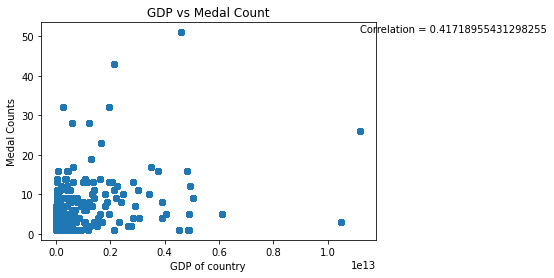

In [83]:
medal_won = medals_gdp['Medal'] > 0

correlation = medals_gdp.loc[medal_won, ['GDP', 'Medal']].corr()['Medal'][0]

plot(medals_gdp.loc[medal_won, 'GDP'], 
     medals_gdp.loc[medal_won, 'Medal'] , 
     linestyle = 'none', 
     marker = 'o',
    alpha = 0.4)
xlabel('GDP of country')

ylabel('Medal Counts')
title('GDP vs Medal Count')
text(np.nanpercentile(medals_gdp['GDP'], 99.6), 
     max(medals_gdp['Medal']),
     "Correlation = " + str(correlation))

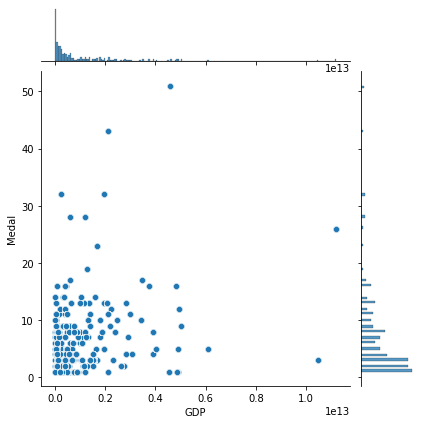

In [84]:
sns.jointplot(x=medals_gdp['GDP'], y= medals_gdp['Medal'],data=medals_gdp)

### Ploting graphs to check if any correlation between any columns in dataset

In [85]:
sns.pairplot(medals_gdp)

Positive correlation shows relation between GDP and number of medals. GDP positively impacts number of medals won by a country. Higher the GDP higher the medal count

In [86]:
##3 Calculating number of male and female players per region 
final_data_gender = olympics_data_final.loc[:,['Year','Team', 'Name', 'Sex']]

final_data_gender = pd.pivot_table(final_data_gender,
                                        index = ['Year', 'Team'],
                                        columns = 'Sex',
                                        aggfunc = 'count').reset_index()

final_data_gender.columns = ['Year', 'Team', 'Female', 'Male']
final_data_gender = final_data_gender.fillna(0)

final_data_gender['Total_Athletes'] = final_data_gender['Female'] + final_data_gender['Male']

In [87]:
olympics_data_final.head()

ID            Name Sex   Age  Height  Weight       Team  NOC  Year  \
0      1       A Dijiang   M  24.0   180.0    80.0      China  CHN  1992   
1   5887     Au Woon Yiu   M  31.0   168.0    65.0  Hong Kong  HKG  1992   
2   6848  Bai Chongguang   M  21.0   184.0    83.0      China  CHN  1992   
3   6854         Bai Mei   F  17.0   166.0    46.0      China  CHN  1992   
4  11225        Bi Zhong   M  23.0   188.0   110.0      China  CHN  1992   

   Season  ... Country_x Latitude_x Longitude_x Country_y Latitude_y  \
0  Summer  ...     Spain  40.463667    -3.74922     China   35.86166   
1  Summer  ...     Spain  40.463667    -3.74922     China   35.86166   
2  Summer  ...     Spain  40.463667    -3.74922     China   35.86166   
3  Summer  ...     Spain  40.463667    -3.74922     China   35.86166   
4  Summer  ...     Spain  40.463667    -3.74922     China   35.86166   

  Longitude_y        AtheleteLatitude    HostCountryLatitude     distance  \
0  104.195397  (35.86166, 104.195397)  (40.463667, -3.74922)  8808.721088   
1  104.195397  (35.86166, 104.195397)  (40.463667, -3.74922)  8808.721088   
2  104.195397  (35.86166, 104.195397)  (40.463667, -3.74922)  8808.721088   
3  104.195397  (35.86166, 104.195397)  (40.463667, -3.74922)  8808.721088   
4  104.195397  (35.86166, 104.195397)  (40.463667, -3.74922)  8808.721088   

      distance  
0  8808.721088  
1  8808.721088  
2  8808.721088  
3  8808.721088  
4  8808.721088  

[5 rows x 25 columns]

In [88]:
final_data_gender.head(2)

Year                     Team  Female  Male  Total_Athletes
0  1896                Australia     0.0   4.0             4.0
1  1896  Australia/Great Britain     0.0   1.0             1.0

In [89]:
medals_gdp.head(3)

Year  Medal       Team           GDP   Age  Height
6577  1960      8  Australia  1.859335e+10  22.0   190.0
6578  1960      8  Australia  1.859335e+10  16.0   162.0
6579  1960      8  Australia  1.859335e+10  29.0   188.0

In [90]:
medals_gdp.isnull().sum()

Year      0
Medal     0
Team      0
GDP       0
Age       0
Height    0
dtype: int64

In [91]:
final_data_medal.head(3)

region  Medal_x   Age  Height  Weight  Year      distance      distance
0  Australia        2  19.0     NaN     NaN  1992  15755.532939  15755.532939
1  Australia        2  46.0   163.0    93.0  1992  15755.532939  15755.532939
2  Australia        2  46.0   163.0    93.0  1992  15755.532939  15755.532939

In [92]:
medals_analysis = medals_gdp.merge(final_data_medal,
                                   left_on = ['Year', 'Team'],
                                   right_on = ['Year', 'region'],
                                   how = 'left')


In [93]:
medals_analysis_final = medals_gdp.merge(final_data_gender,
                                   left_on = ['Year', 'Team'],
                                   right_on = ['Year', 'Team'],
                                   how = 'left')

In [94]:
medals_analysis_final.dropna(how = 'any', inplace = True)
medals_analysis_final.head(3)

Year  Medal       Team           GDP   Age  Height  Female   Male  \
0  1960      8  Australia  1.859335e+10  22.0   190.0    56.0  214.0   
1  1960      8  Australia  1.859335e+10  16.0   162.0    56.0  214.0   
2  1960      8  Australia  1.859335e+10  29.0   188.0    56.0  214.0   

   Total_Athletes  
0           270.0  
1           270.0  
2           270.0

In [95]:
olympics_data_host_country = olympics_data_final.loc[:,['Year','Team', 'region', 'Country_x']].drop_duplicates()
olympics_data_host_country.head(3)

Year       Team region Country_x
0   1992      China  China     Spain
1   1992  Hong Kong  China     Spain
20  1992    China-1  China     Spain

In [96]:
host_country_medals = olympics_data_host_country.merge(ranks_data,
                                   left_on = ['Year', 'region'],
                                   right_on = ['Year', 'region'],
                                   how = 'left')

In [97]:
host_country_medals =host_country_medals.drop('Team', axis=1)

In [98]:
host_country_medals = host_country_medals.drop_duplicates()

In [99]:
host_country_medals.dropna()

Year      region  Country_x  Medal
0     1992       China      Spain   16.0
4     1992       China     France   16.0
5     2010       China     Canada    5.0
8     1988       China     Canada    5.0
15    2000       China  Australia   28.0
...    ...         ...        ...    ...
3996  2008  Uzbekistan      China    1.0
3997  2016  Uzbekistan     Brazil    4.0
3998  2004  Uzbekistan     Greece    2.0
4006  2016     Armenia     Brazil    1.0
4118  2016      Kosovo     Brazil    1.0

[928 rows x 4 columns]

In [100]:
host_country_medals['Prev_Year'] = host_country_medals['Year'] - 4
host_country_medals['Next_Year'] = host_country_medals['Year'] + 4
host_country_medals_only = host_country_medals[host_country_medals['Country_x'] == host_country_medals['region']]

In [101]:
host_country_medals_only.head(4)

Year   region Country_x  Medal  Prev_Year  Next_Year
33   2008    China     China   51.0       2004       2012
70   1952  Finland   Finland    9.0       1948       1956
139  1994   Norway    Norway    8.0       1990       1998
140  1952   Norway    Norway   10.0       1948       1956

In [102]:
host_team_medals_won = host_country_medals_only.merge(ranks_data,
                                           left_on = ['Prev_Year', 'region'],
                                           right_on = ['Year', 'region'],
                                           how = 'left')
host_team_medals_won = host_team_medals_won.merge(ranks_data,
                                           left_on = ['Next_Year', 'region'],
                                           right_on = ['Year', 'region'],
                                           how = 'left')
host_team_medals_won.head(5)

Year   region Country_x  Medal_x  Prev_Year  Next_Year  Medal_y  Medal
0  2008    China     China     51.0       2004       2012     32.0    NaN
1  1952  Finland   Finland      9.0       1948       1956      1.0    6.0
2  1994   Norway    Norway      8.0       1990       1998      NaN    8.0
3  1952   Norway    Norway     10.0       1948       1956      4.0    3.0
4  1956    Italy     Italy      9.0       1952       1960      9.0   13.0

Using linear model checking if there is any home advantage for country to win medals or not 

In [103]:
### Calculating if there is home country win 
host_country_medals['Home_country_win'] = np.where(host_country_medals['Country_x'] == host_country_medals['region'], 1, 0)

In [104]:
host_country_medals.head(4)

Year region Country_x  Medal  Prev_Year  Next_Year  Home_country_win
0  1992  China     Spain   16.0       1988       1996                 0
4  1992  China    France   16.0       1988       1996                 0
5  2010  China    Canada    5.0       2006       2014                 0
6  1976  China    Canada    NaN       1972       1980                 0

In [105]:
import math

In [106]:
#Calculating log of GDP as GDP value is very high
medals_analysis_final['Log_GDP'] = np.log(medals_analysis_final['GDP'])
##medals_analysis_final['Log_Height'] = np.log(medals_analysis_final['Height'])

In [107]:
medals_analysis_final.drop_duplicates()

Year  Medal       Team           GDP   Age  Height  Female   Male  \
0      1960      8  Australia  1.859335e+10  22.0   190.0    56.0  214.0   
1      1960      8  Australia  1.859335e+10  16.0   162.0    56.0  214.0   
2      1960      8  Australia  1.859335e+10  29.0   188.0    56.0  214.0   
3      1960      8  Australia  1.859335e+10  21.0   177.0    56.0  214.0   
4      1960      8  Australia  1.859335e+10  20.0   188.0    56.0  214.0   
...     ...    ...        ...           ...   ...     ...     ...    ...   
47193  2016      1    Vietnam  2.052760e+11  42.0   170.0    16.0   12.0   
47194  2016      1    Vietnam  2.052760e+11  28.0   158.0    16.0   12.0   
47195  2016      1    Vietnam  2.052760e+11  23.0   185.0    16.0   12.0   
47196  2016      1    Vietnam  2.052760e+11  24.0   163.0    16.0   12.0   
47197  2016      1    Vietnam  2.052760e+11  24.0   155.0    16.0   12.0   

       Total_Athletes    Log_GDP  
0               270.0  23.646070  
1               270.0  23.646070  
2               270.0  23.646070  
3               270.0  23.646070  
4               270.0  23.646070  
...               ...        ...  
47193            28.0  26.047621  
47194            28.0  26.047621  
47195            28.0  26.047621  
47196            28.0  26.047621  
47197            28.0  26.047621  

[47198 rows x 10 columns]

### Used Design Matrix which is part of Linear Model 
The design matrix contains data on the independent variables (also called explanatory variables) in statistical models which attempt to explain observed data on a response variable (often called a dependent variable) in terms of the explanatory variables. The theory relating to such models makes substantial use of matrix manipulations involving the design matrix: see for example linear regression. A notable feature of the concept of a design matrix is that it is able to represent a number of different experimental designs and statistical models

    ##### used OLS -ordinary Least squares model
OLS is one such model which tells you much more than only the accuracy of the overall model. It also tells you how each variables have fared, if we have unwanted variables, if there is autocorrelation in the data

In [125]:
import statsmodels.api as sm
from patsy import dmatrices

y, X = dmatrices('Medal ~  GDP + Total_Athletes + Male + Height + Age', 
                data = medals_analysis_final,
                return_type = 'dataframe')

model = sm.OLS(y, X)
result = model.fit()

result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Medal   R-squared:                       0.514
Model:                            OLS   Adj. R-squared:                  0.513
Method:                 Least Squares   F-statistic:                     9963.
Date:                Tue, 03 May 2022   Prob (F-statistic):               0.00
Time:                        13:40:25   Log-Likelihood:            -1.4698e+05
No. Observations:               47198   AIC:                         2.940e+05
Df Residuals:                   47192   BIC:                         2.940e+05
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept         -1.5825      0.420     -3.764      0.000      -2.407      -0.758
GDP             6.571e-13   2.05e-14     32.041      0.000    6.17e-13    6.97e-13
Total_Athletes     0.0543      0.001    108.457      0.000       0.053       0.055
Male              -0.0475      0.001    -59.925      0.000      -0.049      -0.046
Height             0.0112      0.002      4.805      0.000       0.007       0.016
Age               -0.0518      0.005    -11.292      0.000      -0.061      -0.043
==============================================================================
Omnibus:                    16606.869   Durbin-Watson:                   0.016
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           100578.219
Skew:                           1.568   Prob(JB):                         0.00
Kurtosis:                       9.427   Cond. No.                     2.80e+13
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.8e+13. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

#### Our model is 51% accurate .

## StatsModel API Linear Model 

### GLM - This helps in constructing the models that are of generalized Linear structure.

statsmodels.formula.api: A convenience interface for specifying models using formula strings and DataFrames. This API directly exposes the from_formula class method of models that support the formula API

In [109]:
import statsmodels.formula.api as smf

In [126]:
medals = smf.glm('Medal ~ GDP + Total_Athletes + Male + Height + Age', data=medals_analysis_final).fit(scale='X2')


In [127]:
medals.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                  Medal   No. Observations:                47198
Model:                            GLM   Df Residuals:                    47194
Model Family:                Gaussian   Df Model:                            3
Link Function:               identity   Scale:                          29.683
Method:                          IRLS   Log-Likelihood:            -1.4698e+05
Date:                Tue, 03 May 2022   Deviance:                   1.4009e+06
Time:                        13:40:53   Pearson chi2:                 1.40e+06
No. Iterations:                     3   Pseudo R-squ. (CS):             0.6520
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept         -1.5825      0.420     -3.764      0.000      -2.406      -0.758
GDP             6.571e-13   2.05e-14     32.042      0.000    6.17e-13    6.97e-13
Total_Athletes     0.0543      0.001    108.459      0.000       0.053       0.055
Male              -0.0475      0.001    -59.927      0.000      -0.049      -0.046
Height             0.0112      0.002      4.805      0.000       0.007       0.016
Age               -0.0518      0.005    -11.292      0.000      -0.061      -0.043
==================================================================================
"""

The term “R-squared” is derived from this definition. R-squared is the square of the correlation between the model’s predicted values and the actual values.  This correlation can range from -1 to 1, and so the square of the correlation then ranges from 0 to 1.  The greater the magnitude of the correlation between the predicted values and the actual values, the greater the R-squared, regardless of whether the correlation is positive or negative.

Above model R-square is 0.65 so our Model is 65% accurate !! 

#### With above Models we will be able to predict medals on basis of factors - GDP, no of Players/Athletes, Height, age 